
First make sure to run your ssh tunnel with:  
GCP: 
  `gcloud compute ssh --zone us-east1-b --project katana-internal31 katana-controller -- -NL 8080:127.0.0.1:8080 -vvv`
<br> <br>
AWS: 
  `ssh -i ~/.ssh/id_rsa -N -L 8080:54.162.203.170:8080 ubuntu@54.162.203.170 -vvv` 
<br><br>  

In [73]:
######## setup variables ##########
gs_prefix="gs://anand-31-simple-files/aml-customer-extended"
cluster_name="katana-internal31"
partitions = 1
platform_prefix=gs_prefix

In [74]:
import os                                                                        
import time                                                                      
import json
import pandas as pd
from timeit import default_timer as timer
from katana.remote import aio, analytics, import_data, trace

from katana import remote
from katana.remote import import_data

os.environ["KATANA_SERVER_ADDRESS"] = "host.docker.internal:8080"

pd.set_option('display.max_columns', None)
pd.set_option("max_colwidth", None)

In [75]:
from diagrams import Cluster, Diagram
from diagrams.gcp.analytics import BigQuery, Dataflow, PubSub
from diagrams.gcp.compute import AppEngine, Functions
from diagrams.gcp.database import BigTable
from diagrams.gcp.iot import IotCore
from diagrams.gcp.storage import GCS
from diagrams.programming import flowchart
from diagrams.programming import language
from diagrams.custom import Custom

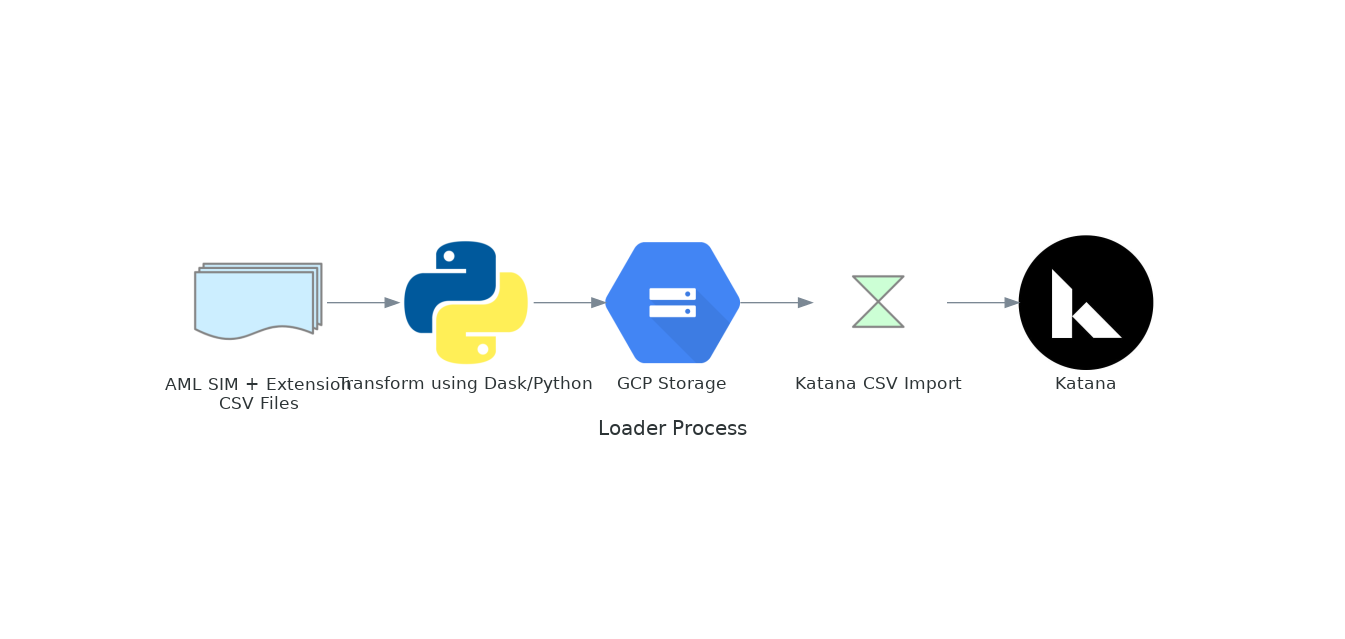

In [76]:
with Diagram("Loader Process", show=False) as loaderDiagram:
    csv = flowchart.MultipleDocuments(" AML SIM + Extension \nCSV Files")
    tx = language.Python("Transform using Dask/Python")
    store = GCS("GCP Storage")
    importdata = flowchart.Collate("Katana CSV Import") 
    database = Custom("Katana", "./res/katana.png")
    csv >> tx >> store >> importdata >> database

loaderDiagram

In [77]:
rc=remote.Client()
rc.server_version

'0.1.101rc1.dev+26.5.fecc99.6020d8'

In [78]:

graph = rc.create_graph(
    num_partitions=partitions,
    name="aml-100-customer-extended-demo-jan2022"
)

In [80]:
graph.graph_id

'CGR2Z5e23vtKCgZKqgLrNyXrox1BfzzMLzkqs9iCRAvs'

In [81]:
test_node_file = platform_prefix + "/nodes.txt"
test_edge_file = platform_prefix + "/edges.txt"
input_path=platform_prefix 


In [82]:
start = timer()
print("Importing graph from CSV files...")
import_data.csv(
    graph,
    input_node_path=test_node_file,
    input_edge_path=test_edge_file,
    input_dir=input_path,
#    have_headers=True,
    data_delimiter=",",
    schema_delimiter=","
    #partition_policy="random-oec"
)
end = timer()
print(f"  import: {end - start:.1f} seconds") 

Importing graph from CSV files...


          0/? [?op/s]

  import: 16.0 seconds


In [83]:
%%time
graph.num_nodes()

          0/? [?op/s]

CPU times: user 61.3 ms, sys: 10.7 ms, total: 72 ms
Wall time: 6.26 s


157927

<b> Import ends here: DATA LOADING COMPLETE </b>